1.csv 폴더에서 Sales Records.csv 파일 로드
2. 'Order ID', 'Total Revenue' 'Total Cost', 'Total profit', 'SalesChannel'
컬럼을 제거
3. 컬럼의 이름들을 변경 -> ['대륙', '국가', '상품종류', '우선순위'
    '주문일자', '발송일자', '판매단위', '단가', '원가']
4. 데이터의 결측치가 존재하는가?
5. 대륙, 국가를 기준으로 오름차순 정렬
6. 인덱스를 재지정(기존의 인덱스를 제거)
7. 새로운 파생변수 생성
        -총단가 : 판매개수 * 단가 
        -총원가: 판매개수 * 원가
        -총이윤: 총단가- 총원가

In [1]:
import pandas as pd

In [37]:
# Sales Record.csv 파일을 로드
#상위로 이동(../)
#-> csv하위폴더이동(csv/)-> Sales Records.csv
sales=pd.read_csv('../csv/Sales Records.csv')

In [38]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [39]:
## 특정 컬럼을 제거
sales.drop(
   ['Order ID', 'Total Revenue','Total Cost', 'Total Profit', 'Sales Channel'],
    axis=1, inplace=True)


In [40]:
# 컬럼의 이름을 변경
sales.columns= ['대륙', '국가', '상품종류', '우선순위', 
                '주문일자', '발송일자', '판매개수', '단가', '원가']

In [41]:
## 결측치를 확인
## 데이터 프레임의 정보를 출력
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대륙      10000 non-null  object 
 1   국가      10000 non-null  object 
 2   상품종류    10000 non-null  object 
 3   우선순위    10000 non-null  object 
 4   주문일자    10000 non-null  object 
 5   발송일자    10000 non-null  object 
 6   판매개수    10000 non-null  int64  
 7   단가      10000 non-null  float64
 8   원가      10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [42]:
## 통계요약정보를 출력
sales.describe()

,판매개수,단가,원가
count,10000.000000,10000.000000,10000.000000
mean,5002.855900,268.143139,188.806639
std,2873.246454,217.944092,176.445907
min,2.000000,9.330000,6.920000
25%,2530.750000,109.280000,56.670000
50%,4962.000000,205.700000,117.110000
75%,7472.000000,437.200000,364.690000
max,10000.000000,668.270000,524.960000


In [43]:
## 컬럼별 결측치의 개수를 출력
sales.isna().sum()

대륙      0
국가      0
상품종류    0
우선순위    0
주문일자    0
발송일자    0
판매개수    0
단가      0
원가      0
dtype: int64

In [44]:
## 데이터를 백업 
df = sales.copy()

In [45]:
df.head(1)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96


In [46]:
## 오름차순 정렬 (기준이 되는 데이터가 2개 [대륙, 국가]) 순서조심 대륙먼저 하고 국가별로 오름차순 
df.sort_values(
    ['대륙', '국가'],
    inplace= True
)

In [47]:
# 인덱스를 초기화 (기존의 인덱스는 제거)
df.reset_index(drop=True, inplace=True)

In [49]:
## 3개의 파생변수를 생성
## 총단가= 판매개수* 단가
df['총단가']=df['판매개수']*df['단가']
df.head(3)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04


In [50]:
## 총원가 = 판매개수 * 원가
df['총원가']= df['판매개수']*df['원가']
##총이윤= 총단가- 총원가 
##총이윤=(단가-원가)*판매개수 
df['총이윤']= df['총단가']-df['총원가']
df.head()

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가,총원가,총이윤
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40,236065.20
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41,100322.99
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62,2146.42
3,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11,2009277.60,1143930.48,865347.12
4,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96,5034504.51,4058465.76,976038.75


1. 대륙별 총이윤의 합이 가장 높은 대륙은 어디인가?
2. 국가별 총이윤의 합이 가장 높은 상위 10개의 국가는 어디인가
3. 어떤 상품이 가장 큰 이윤을 남겼는가?


In [53]:
# 대륙별 총 이윤 합
# 대륙별 그룹화
# 그룹화 함수 : groupby([기준이 되는 컬럼])
df.groupby(
    ['대륙']
).sum()[['총이윤']]

,총이윤
대륙,
Asia,5.874033e+08
Australia and Oceania,3.240712e+08
Central America and the Caribbean,4.033578e+08
Europe,1.027000e+09
Middle East and North Africa,5.099239e+08
North America,9.949552e+07
Sub-Saharan Africa,9.996421e+08


In [59]:
# case2: 전체 데이터프레임에서 컬럼을 필터링 -> 그룹화 
group_data=\
df[['대륙', '총이윤'] ].groupby(['대륙']).sum()

In [60]:
group_data.sort_values(['총이윤'], ascending=False)

,총이윤
대륙,
Europe,1.027000e+09
Sub-Saharan Africa,9.996421e+08
Asia,5.874033e+08
Middle East and North Africa,5.099239e+08
Central America and the Caribbean,4.033578e+08
Australia and Oceania,3.240712e+08
North America,9.949552e+07


In [61]:
## 어떤 국가가 과연 가장많은 이윤을 내는가?
## 상위의 10개의 국가를 확인 

In [62]:
df.groupby(
    ['국가']
).sum()[['총이윤']]

,총이윤
국가,
Afghanistan,22977020.06
Albania,19583969.70
Algeria,22125886.64
Andorra,16653936.87
Angola,19596150.58
...,...
Vatican City,16978429.04
Vietnam,23415377.02
Yemen,16666875.07


In [63]:
df.head(10)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가,총원가,총이윤
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40,236065.20
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41,100322.99
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62,2146.42
3,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11,2009277.60,1143930.48,865347.12
4,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96,5034504.51,4058465.76,976038.75
5,Asia,Bangladesh,Household,C,10/17/2011,11/15/2011,3701,668.27,502.54,2473267.27,1859900.54,613366.73
6,Asia,Bangladesh,Cereal,C,11/20/2015,12/26/2015,2691,205.70,117.11,553538.70,315143.01,238395.69
7,Asia,Bangladesh,Cereal,L,4/13/2014,5/27/2014,4834,205.70,117.11,994353.80,566109.74,428244.06
8,Asia,Bangladesh,Office Supplies,M,1/29/2016,3/6/2016,400,651.21,524.96,260484.00,209984.00,50500.00
9,Asia,Bangladesh,Vegetables,C,5/14/2017,6/2/2017,6179,154.06,90.93,951936.74,561856.47,390080.27


In [68]:
group_data2=\
df[['국가', '총이윤'] ].groupby(['국가']).sum()

In [71]:
group_data2.sort_values(['총이윤'], 
                        ascending=False,
                        inplace=True)

In [72]:
group_data2.head(10)

,총이윤
국가,
Kiribati,32454798.26
Qatar,30861356.79
Grenada,30302769.90
Taiwan,30044779.98
Malawi,29329125.05
Botswana,29019726.67
Bangladesh,28092720.77
Lithuania,28063374.02
Burundi,27911293.45


In [79]:
## 과연 한국의 등수는 몇등일까?
## case1: index는 list임으로 list 내장함수(index())를 이용
indexs=list(group_data2.index)
indexs.index('South Korea')+1

48

In [81]:
# case2: 인덱스를 초기화 (기존의 인덱스를 보존)
group_data3=group_data2.reset_index()
group_data3.loc[
    group_data3['국가']=='South Korea'
]

,국가,총이윤
47,South Korea,23893933.75


In [83]:
## 어떠한 상품 종류가 많이 팔렸는가?

# 그룹화 연산
group_data4=\
df[ ['상품종류', '판매개수']].groupby(['상품종류']).sum()

In [84]:
group_data4.sort_values((['판매개수']),ascending=False)

,판매개수
상품종류,
Personal Care,4402827
Clothes,4352350
Household,4336803
Vegetables,4238098
Cereal,4203394
Baby Food,4197006
Snacks,4122781
Office Supplies,4120263
Cosmetics,4103290


In [86]:
# 그룹화를 할 컬럼이 2개 이상인 경우
# 그룹화 연산도 2개 이상인 경우
df[
    ['국가', '상품종류', '판매개수']
].groupby(
    ['국가', '상품종류']
).sum(['sum', 'count'])

판매개수
국가          상품종류                  
Afghanistan Baby Food         1368
            Beverages        14380
            Cereal           54917
            Clothes          29887
            Cosmetics        12177
...                            ...
Zimbabwe    Meat              9640
            Office Supplies  17447
            Personal Care    18478
            Snacks           16314
            Vegetables       33945

[2198 rows x 1 columns]

In [96]:
## pivot_table(0)
## pands 에 내장된 함수
pd.pivot_table(
    df,
    index= '국가', 
    columns='상품종류', 
    values='판매개수',
    aggfunc='sum',
    margins=True,
    fill_value= 0 
)

상품종류,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables,All
국가,,,,,,,,,,,,,
Afghanistan,1368,14380,54917,29887,12177,15791,32221,39330,18338,18899,26466,24832,288606
Albania,25985,22109,18580,30199,20375,26785,23705,28387,12623,35973,9154,11462,265337
Algeria,36393,10330,32498,21002,30506,17578,8482,15915,25956,24629,21037,21186,265512
Andorra,17592,22132,22618,6296,16156,41365,12839,14747,29795,42303,18764,6628,251235
Angola,36948,20666,34274,11404,22465,29812,8305,22134,5879,30464,51486,14129,287966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,25450,7981,20189,17880,14571,20686,26646,47200,31262,32229,30201,25822,300117
Yemen,22672,25690,15503,21235,7238,24168,31091,15098,6335,41380,15054,18350,243814
Zambia,51886,9825,21888,16282,22115,34906,24334,23886,30959,23469,28108,0,287658


In [97]:
import matplotlib.pyplot as plt

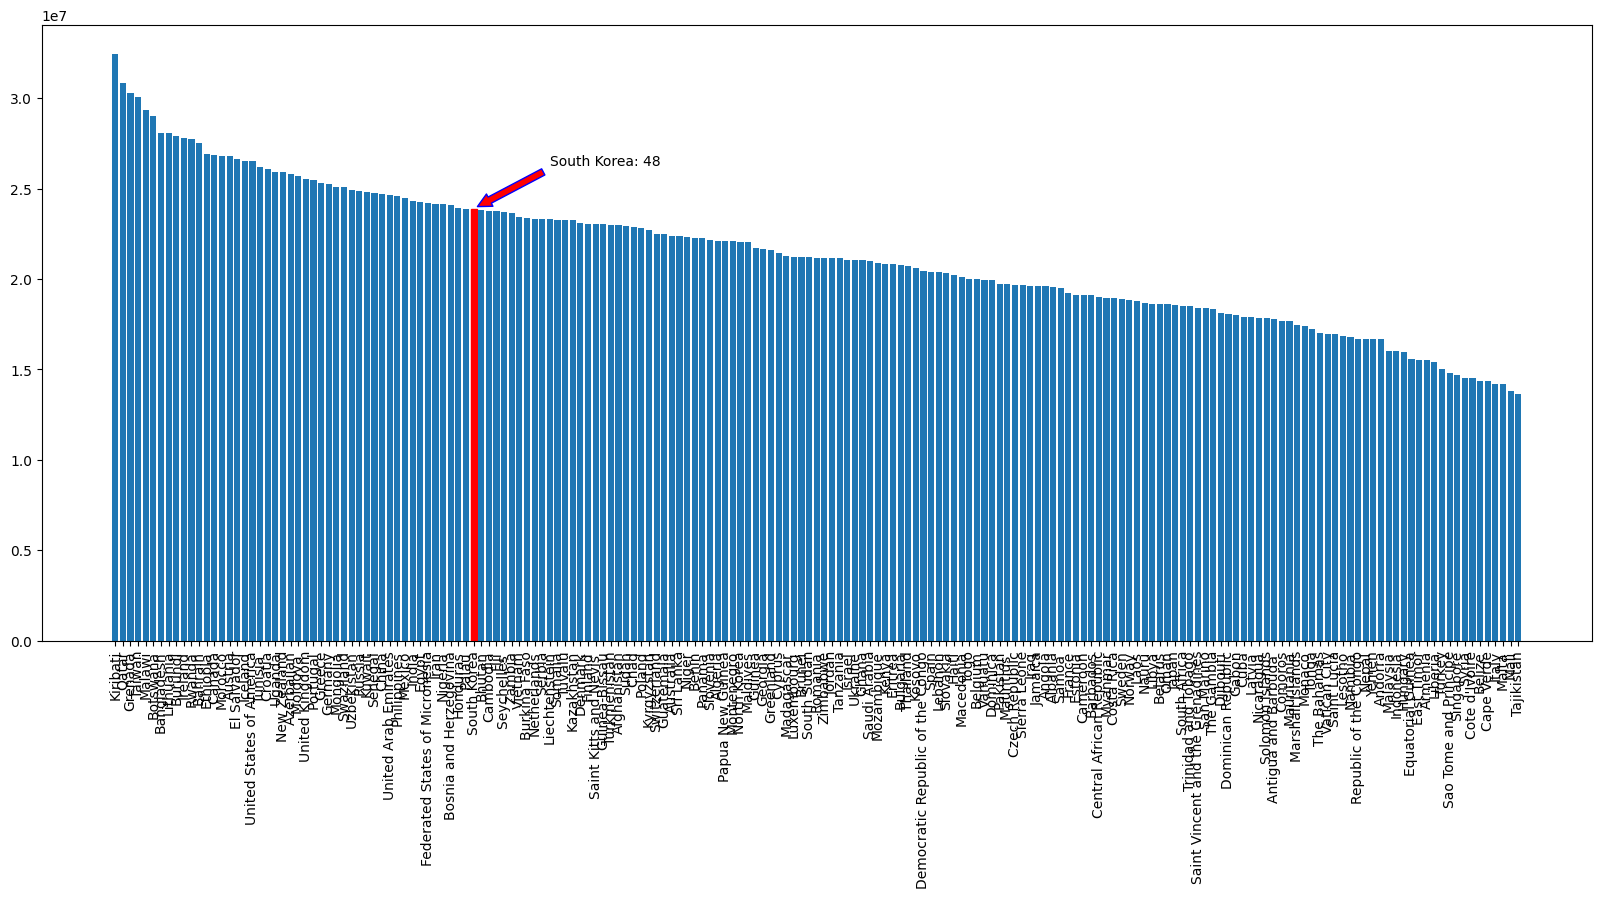

In [103]:
##group_data2를 가지고 그래프 생성
#막대 그래프 생성
x=group_data2.index
y=group_data2['총이윤']

korea_rank= list(group_data2.index).index('South Korea')
korea_value= group_data2.loc['South Korea', '총이윤']

#그래프의 사이즈를 변경
plt.figure(figsize=(20,8))
           
graph=plt.bar(x,y)
graph[korea_rank].set_color('r')

# x축의 데이터들을 회전
plt.xticks(rotation=90)

# 그래프에 주석을 추가
plt.annotate(
    f"South Korea: {korea_rank+1}",
    xy=(korea_rank, korea_value),   #화살표가 지정되는 좌표
    xytext=(korea_rank + 10, korea_value * 1.1), #주석의 좌표  
    arrowprops={
        'facecolor':'r',#화살표 내부의 색을 지정
        'edgecolor':'b',#화살표 테두리의 색을 지정
        'headwidth': 10, #화살표 머리의 너비
        'headlength': 10, #화살표 머리의 길이
        'width':5,      #화살표 꼬리의 너비
        'shrink':0.05   #화살표와 주석의 거리
    }
)


plt.show()